In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from waterfall_ax import WaterfallChart
# %load_ext rpy2.ipython

In [59]:
cases = []

# nofusion_baseline_path = Path(Path.cwd(), 'Fusion_trials_baseline', 'Results')
# print(f'Baseline exists: {nofusion_baseline_path.is_dir()}')
# nofusion_baseline = {
#     'path': nofusion_baseline_path,
#     'name': 'No fusion baseline',
#     }
# cases.append(nofusion_baseline)

# const_vv_path = Path(Path.cwd(), 'Fusion_trials_constVV', 'Results')
# print(f'Constant VV costs exists: {const_vv_path.is_dir()}')
# const_vv = {
#     'path': const_vv_path,
#     'name': 'FPP with constant vacuum vessel costs',
# }
# cases.append(const_vv)

expensive_var_vv_path = Path(Path.cwd(), 'Fusion_trials_varVV', 'Results')
print(f'Degrading VV costs exists: {expensive_var_vv_path.is_dir()}')
var_vv = {
    'path': expensive_var_vv_path,
    'name': 'FPP with variable vacuum vessel costs',
    }
cases.append(var_vv)

# var_vv_path = Path(Path.cwd(), 'Fusion_trials_varVV', 'Results_1')
# print(f'Degrading VV costs exists: {var_vv_path.is_dir()}')
# var_vv = {
#     'path': var_vv_path,
#     'name': 'FPP with variable and high vacuum vessel costs',
#     }
# cases.append(var_vv)

# var_vv_thermstor_path = Path(Path.cwd(), 'Fusion_trials_varVV_thermstor', 'Results')
# print(f'Degrading VV costs with thermal storage exists: {var_vv_thermstor_path.is_dir()}')
# var_vv_thermstor = {
#     'path': var_vv_thermstor_path,
#     'name': 'FPP with variable vacuum vessel costs and thermal storage',
#     }
# cases.append(var_vv_thermstor)

# val_te_path = Path(Path.cwd(), 'TEBalance_Valid', 'Results')
# print(f'Thermal and Electrical Balance Check exists: {val_te_path.is_dir()}')
# val_te = {
#     'path': val_te_path,
#     'name': 'FPP with basic thermal and electrical balance',
# }
# cases.append(val_te)

# val_vs_path = Path(Path.cwd(), 'VSCheck_Valid', 'Results')
# print(f'Vessel Check exists: {val_vs_path.is_dir()}')
# val_vs = {
#     'path': val_vs_path,
#     'name': 'FPP with no vessel degradation',
# }
# cases.append(val_vs)

# val_st_path = Path(Path.cwd(), 'StorCheck_Valid', 'Results')
# print(f'Vessel and Thermal Storage Check exists: {val_st_path.is_dir()}')
# val_st = {
#     'path': val_st_path,
#     'name': 'FPP with Vessel Degradation and Thermal Storage',
# }
# cases.append(val_st)

Degrading VV costs exists: True


In [60]:
min_time = 1
max_time = 14 * 24

In [61]:
resources = [
    'fusion',
    'solar_pv',
    'offshore_wind',
    'onshore_wind',
    'battery',
    'natural_gas_ccs',
    'natural_gas',
    'nuclear',
    'Total'
]

resource_names = {
    'fusion': 'Fusion Power Plant',
    'solar_pv': 'Utility-Scale Solar PV',
    'offshore_wind': 'Offshore Wind',
    'onshore_wind': 'Onshore Wind',
    'battery': '4-hr Li-ion Batteries',
    'natural_gas_ccs': 'Natural Gas with CCS',
    'natural_gas': 'Natural Gas',
    'nuclear': 'Fission Power Plant',
    'Total': 'Total'
}

resource_colors_temp = {
    'fusion': 'xkcd:light red',
    'solar_pv': 'xkcd:goldenrod',
    'offshore_wind': 'xkcd:light aqua',
    'onshore_wind': 'xkcd:turquoise',
    'battery': 'xkcd:pink',
    'natural_gas_ccs': 'xkcd:grey',
    'natural_gas': 'xkcd:orange',
    'nuclear': 'xkcd:sky blue',
    'Total': 'xkcd:grey'
}

resource_colors = {}
for k, v in resource_names.items():
    resource_colors[v] = resource_colors_temp[k]

# felec_colors_temp = {
#     'Net Electric': 'xkcd:yellow',
#     'Recirc Power': 'xkcd:sky blue',
#     'Imports': 'xkcd:green'
# }




In [62]:
for case in cases:
    case['power'] = pd.read_csv(Path(case['path'], 'power.csv'), index_col=0)
    case['power'].drop(['Zone', 'AnnualSum'], inplace=True)
    # if case['path'] == nofusion_baseline_path:
    if 'fusion' not in case['power'].columns:
        case['power']['fusion'] = np.zeros(8760)
    case['power'] = case['power'][resources]
    case['power'].rename(columns=resource_names, inplace=True)
    case['power'].drop(columns=['Total', 'Fission Power Plant'], inplace=True)
    case['power'].index = np.linspace(1, 8760, 8760)

In [63]:
for case in cases:
    case['charge'] = pd.read_csv(Path(case['path'], 'charge.csv'), index_col=0)
    case['charge'].drop(['Zone', 'AnnualSum'], inplace=True)
    # if case['path'] == nofusion_baseline_path:
    if 'fusion' not in case['charge'].columns:
        case['charge']['fusion'] = np.zeros(8760)
    case['charge'] = case['charge'][resources]
    case['charge'].rename(columns=resource_names, inplace=True)
    case['charge'].drop(columns=['Total', 'Fission Power Plant'], inplace=True)
    case['charge'].index = np.linspace(1, 8760, 8760)

In [64]:
for case in cases:
    case['capacity'] = pd.read_csv(Path(case['path'], 'capacity.csv'), index_col=0)
    case['capacity'].rename(index=resource_names, inplace=True)
    case['capacity'].drop(['Total', 'Fission Power Plant'], inplace=True)

In [65]:
for case in cases:
    case['fusion_time'] = pd.read_csv(Path(case['path'], 'fusion/fusion_time_8.csv'), index_col=0)
    case['fusion_time'].index = np.linspace(1, 8760, 8760)
    

In [66]:
for case in cases:
    case['fusion_var'] = pd.read_csv(Path(case['path'], 'fusion_var.csv'), index_col=0)
    

In [67]:
for case in cases:
    case['cost'] = pd.read_csv(Path(case['path'], 'costs.csv'), index_col=0)
    case['cost'].drop(['cTotal', 'cUnmetRsv', 'cNetworkExp'], inplace=True)


# Power Time Series

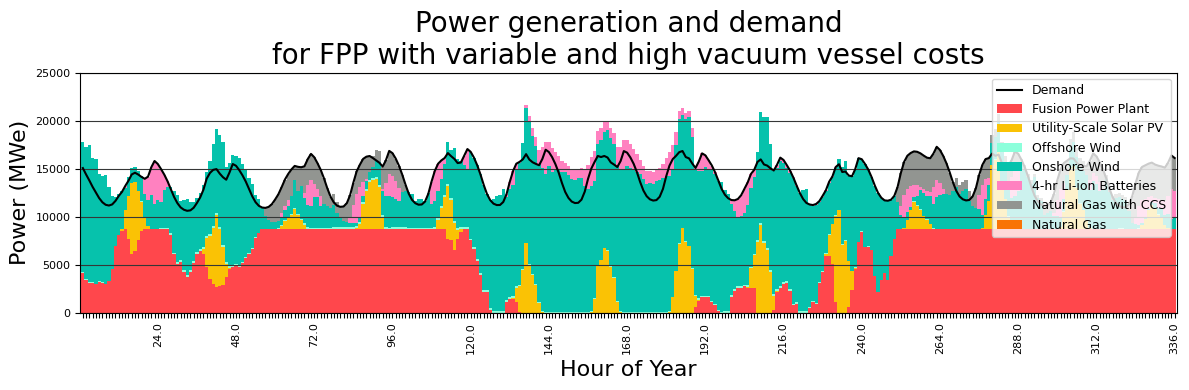

In [68]:
for case in cases:
    fig, ax = plt.subplots(figsize=(12, 4))
    temp_pow = case['power'].loc[min_time:max_time, :]
    temp_pow.plot.bar(ax=ax, stacked=True, width=1.0, fontsize=8, color=resource_colors)
    ax.set_xticklabels([t if not (i+1)%24 else "" for i,t in enumerate(ax.get_xticklabels())])
    ax.set_ylim([0, 25000])

    temp_charge = case['charge'].loc[min_time:max_time, :]
    demand = ax.plot(
        np.linspace(min_time-1, max_time-1, max_time),
        temp_pow.sum(axis=1) - temp_charge.sum(axis=1),
        color='xkcd:black',
        label='Demand'
    )

    handles, labels = ax.get_legend_handles_labels()
    # handles.append(demand[0])
    # labels.append('Demand')
    ax.legend(handles, labels, loc='upper right', fontsize=9)

    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Hour of Year', fontsize = 16)
    ax.set_ylabel('Power (MWe)', fontsize = 16)
    ax.set_title(f'Power generation and demand\nfor {case["name"]}', fontsize = 20)
    fig.tight_layout()


# Capacity factors

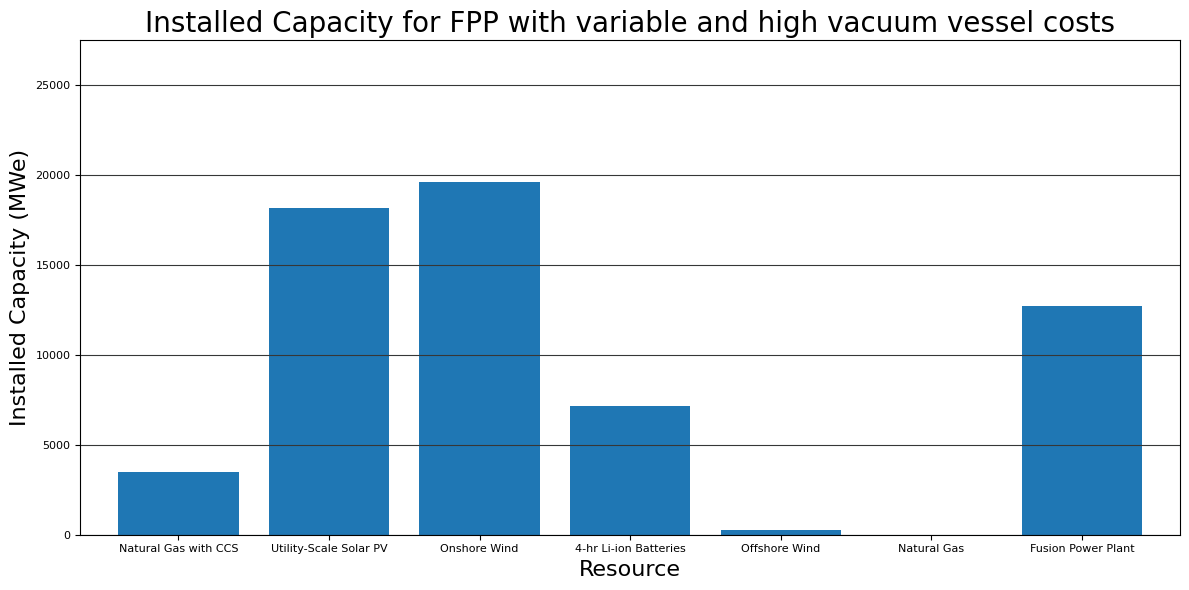

In [69]:
for case in cases:  
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    temp_cap = case['capacity'].loc[:,'EndCap']  
    temp_cap.plot.bar(ax=ax, width=0.8, fontsize=8, rot=0)
    # ax = temp_cap.plot.bar(width=0.8, fontsize=8, figsize=(12, 6), rot=0)
    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Resource', fontsize = 16)
    ax.set_ylabel('Installed Capacity (MWe)', fontsize = 16)
    ax.set_ylim([0, 27500])
    ax.set_title(f'Installed Capacity for {case["name"]}', fontsize = 20)
    fig.tight_layout()

# Capacity comparison to baseline

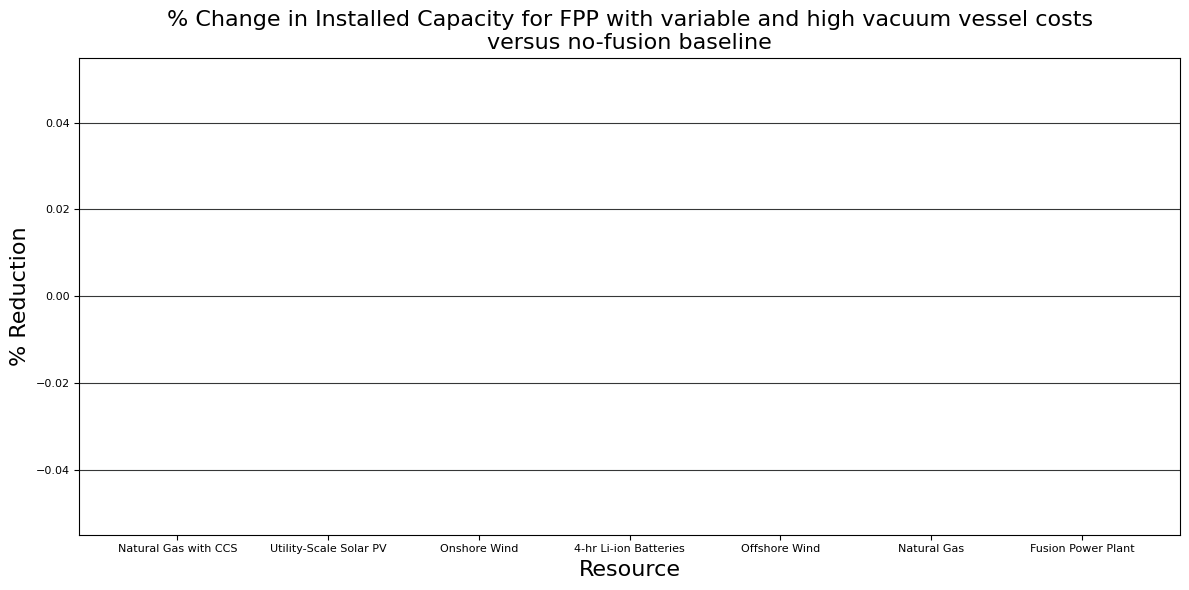

In [70]:
baseline_cap = cases[0]['capacity'].loc[:,'EndCap']

for case in cases: 
    if case['name'] != 'No fusion baseline':
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        temp_cap = 100 * (case['capacity'].loc[:,'EndCap'] - baseline_cap) / baseline_cap
        temp_cap.loc['Offshore Wind'] = 0
        temp_cap.plot.bar(ax=ax, width=0.8, fontsize=8, rot=0)
        # ax = temp_cap.plot.bar(width=0.8, fontsize=8, figsize=(12, 6), rot=0)
        ax.grid(True, axis='y', color='xkcd:dark grey')
        ax.set_xlabel('Resource', fontsize = 16)
        ax.set_ylabel('% Reduction', fontsize = 16)
        # ax.set_ylim([0, 27500])
        ax.set_title(f'% Change in Installed Capacity for {case["name"]}\nversus no-fusion baseline', fontsize = 16)
        fig.tight_layout()

# Cost savings

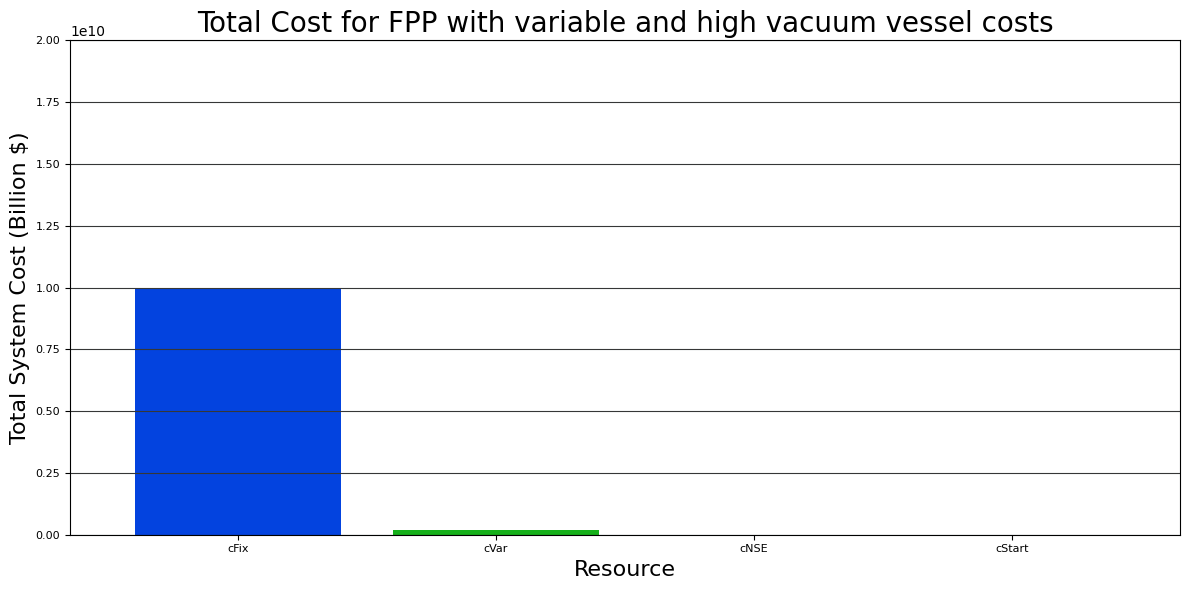

In [71]:
for case in cases:  
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    temp_cost = case['cost'].loc[:,'Total']
    # temp_cost['Costs'] = ['cFix', 'cVar', 'cNSE', 'cStart']
    # temp_cost.set_index(['Costs'], inplace=True)  
    cost_color = ['xkcd:blue', 'xkcd:green', 'xkcd:yellow', 'xkcd:red']
    temp_cost.plot.bar(ax=ax, stacked=True, width=0.8, fontsize=8, rot=0, color = cost_color)
    # ax = temp_cost.plot.bar(width=0.8, stacked=True, fontsize=8, figsize=(12, 6), rot=0)
    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Resource', fontsize = 16)
    ax.set_ylabel('Total System Cost (Billion $)', fontsize = 16)
    ax.set_ylim([0, 20000000000])
    ax.set_title(f'Total Cost for {case["name"]}', fontsize = 20)
    fig.tight_layout()

# Thermal and Electrical Balance

<class 'pandas.core.series.Series'>


NameError: name 'te_tot' is not defined

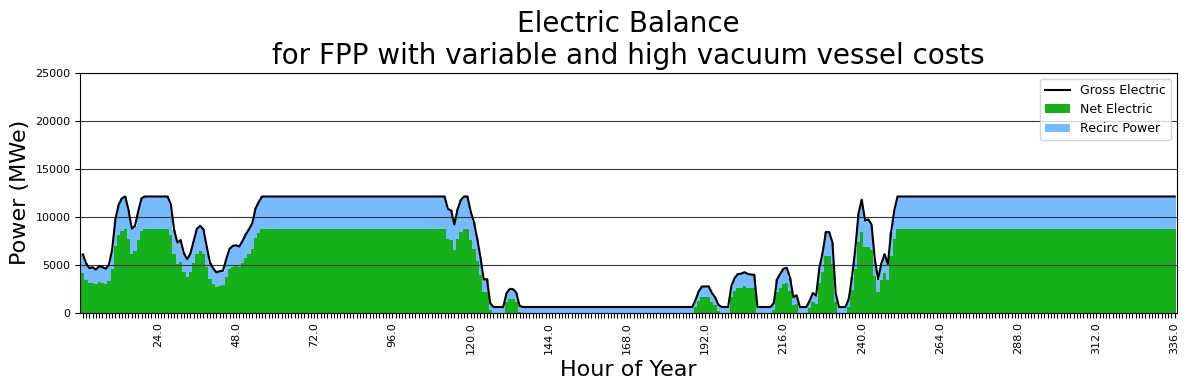

In [72]:
for case in cases:
    fig, ax = plt.subplots(figsize=(12, 4))
    temp_fus = case['fusion_time'].loc[min_time:max_time, :]
    # print(temp_fus.columns)
    # print(temp_fus.index)
    # print(type(temp_fus))

    elec_bal = temp_fus[['Net Electric', 'Recirc Power']]
    gross_elec = temp_fus[['Gross Electric']]
    
    elec_bal_color = ['xkcd:green', 'xkcd:sky blue']
    gross_elec_color = ['xkcd:black']

    elec_bal.plot.bar(ax=ax, stacked=True, width=1.0, fontsize=8, color=elec_bal_color)
    ax.set_xticklabels([t if not (i+1)%24 else "" for i,t in enumerate(ax.get_xticklabels())])
    ax.set_ylim([0, 25000])

    g_ele = ax.plot(
        np.linspace(min_time-1, max_time-1, max_time),
        gross_elec,
        color='xkcd:black',
        label='Gross Electric'
    )

    handles, labels = ax.get_legend_handles_labels()
    # handles.append(demand[0])
    # labels.append('Demand')
    ax.legend(handles, labels, loc='upper right', fontsize=9)

    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Hour of Year', fontsize = 16)
    ax.set_ylabel('Power (MWe)', fontsize = 16)
    ax.set_title(f'Electric Balance\nfor {case["name"]}', fontsize = 20)
    fig.tight_layout()

    
    
    turb_eff = 3.412 / 8.53
    ge_tot = gross_elec.sum()
    print(type(ge_tot))
    print(type(te_tot))
    te_tot = (temp_fus[['Turbine Thermal input']].sum()) * turb_eff
    # diff = ge_tot - te_tot
    print(ge_tot, te_tot)
    if ge_tot.equals(te_tot):
        print(f'Thermal Balance achieved for\n {case["name"]}')
    else:   
        print(f'Thermal Balance failed')
    

# Thermal Balance

   Gross Electric  Turbine Thermal input
0    2.572758e+06           2.572758e+06


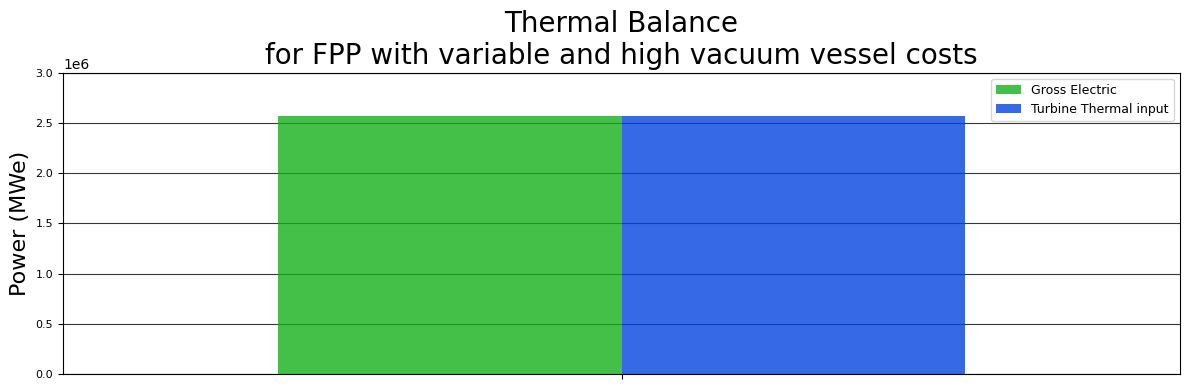

In [73]:
for case in cases:
    fig, ax = plt.subplots(1,1, figsize=(12, 4))
    temp_fus = case['fusion_time'].loc[min_time:max_time, ['Gross Electric', 'Turbine Thermal input']]
    # print(temp_fus.columns)
    # print(temp_fus.index)
    # print(type(temp_fus))

    temp_fus_sum = pd.DataFrame(data=temp_fus.sum()).T
    
    turb_eff = 3.412 / 8.53
    temp_fus_sum['Turbine Thermal input'] = temp_fus_sum['Turbine Thermal input'] * turb_eff

    print(temp_fus_sum)
 
    te_color = ['xkcd:green', 'xkcd:blue']
    
    temp_fus_sum.plot.bar(ax=ax, stacked=False, width=0.8, fontsize=8, color=te_color, alpha = 0.8, zorder = 2)
    ax.set_xticklabels([t if not (i+1)%24 else "" for i,t in enumerate(ax.get_xticklabels())])
    # ax.set_xticklabels(temp_fus_sum.columns)

    ax.set_ylim([0, 3000000])

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper right', fontsize=9)

    ax.grid(True, axis='y', color='xkcd:dark grey')
    # ax.set_xlabel('Hour of Year', fontsize = 16)
    ax.set_ylabel('Power (MWe)', fontsize = 16)
    ax.set_title(f'Thermal Balance\nfor {case["name"]}', fontsize = 20)
    fig.tight_layout()

# Tritium Inventory

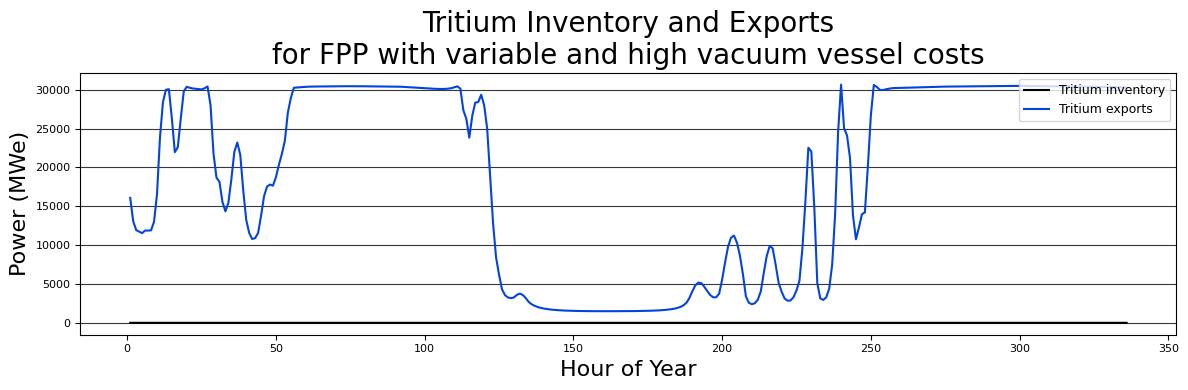

In [79]:
for case in cases:
    fig, ax = plt.subplots(figsize=(12, 4))
    temp_fus_trit = case['fusion_time'].loc[min_time:max_time, ['Tritium inventory']]
    temp_tritex = case['fusion_time'].loc[min_time:max_time, ['Tritium exports']]
    # print(temp_fus.columns)
    # print(temp_fus.index)
    # print(type(temp_fus))

    trit_color = ['xkcd:black']
    tritex_color = ['xkcd:blue']

    temp_fus_trit.plot.line(ax=ax, fontsize=8, color=trit_color)
    temp_tritex.plot.line(ax=ax, fontsize=8, color=tritex_color)
    # ax.set_xticklabels([t if not (i+1)%24 else "" for i,t in enumerate(ax.get_xticklabels())])
    # ax.set_ylim([0, 15000])

    # g_ele = ax.plot(
    #     np.linspace(min_time-1, max_time-1, max_time),
    #     gross_elec,
    #     color='xkcd:black',
    #     label='Gross Electric'
    # )

    handles, labels = ax.get_legend_handles_labels()
    # handles.append(demand[0])
    # labels.append('Demand')
    ax.legend(handles, labels, loc='upper right', fontsize=9)

    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Hour of Year', fontsize = 16)
    ax.set_ylabel('Power (MWe)', fontsize = 16)
    ax.set_title(f'Tritium Inventory and Exports\nfor {case["name"]}', fontsize = 20)
    fig.tight_layout()

# Reactor Utilization

12730.24207740785


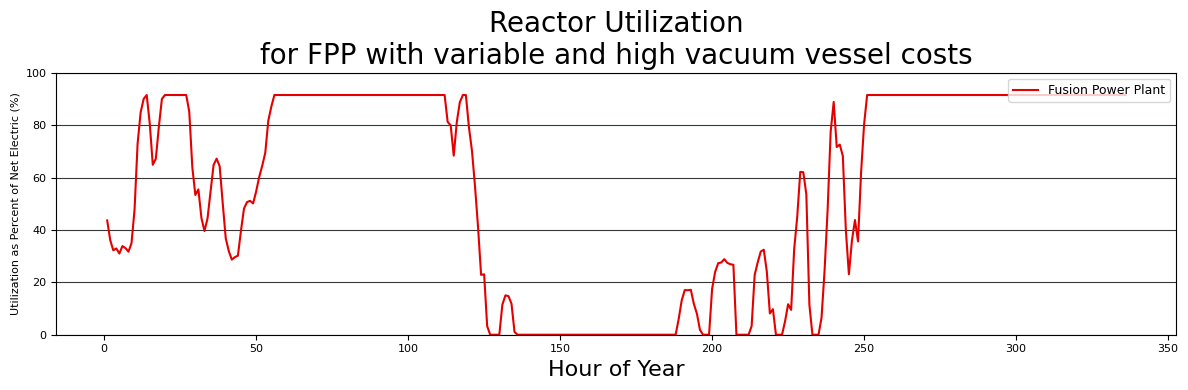

In [75]:
for case in cases:
    fig, ax = plt.subplots(figsize=(12, 4))
    temp_fus = case['power'].loc[min_time:max_time, ['Fusion Power Plant']]
    # print(temp_fus.columns)

    fus_cap = case['capacity'].loc['Fusion Power Plant','EndCap']  
    print(fus_cap)
    # print(temp_fus.index)
    # print(type(temp_fus))

    fus_util = (temp_fus / (fus_cap*(213.29/285.86)))*100
    util_color = ['xkcd:red']

    fus_util.plot.line(ax=ax, fontsize=8, color=util_color)
    # temp_tritex.plot.line(ax=ax, fontsize=8, color=tritex_color)
    # ax.set_xticklabels([t if not (i+1)%24 else "" for i,t in enumerate(ax.get_xticklabels())])
    ax.set_ylim([0, 100])

    # g_ele = ax.plot(
    #     np.linspace(min_time-1, max_time-1, max_time),
    #     gross_elec,
    #     color='xkcd:black',
    #     label='Gross Electric'
    # )

    handles, labels = ax.get_legend_handles_labels()
    # handles.append(demand[0])
    # labels.append('Demand')
    ax.legend(handles, labels, loc='upper right', fontsize=9)

    ax.grid(True, axis='y', color='xkcd:dark grey')
    ax.set_xlabel('Hour of Year', fontsize = 16)
    ax.set_ylabel('Utilization as Percent of Net Electric (%)', fontsize = 8)
    ax.set_title(f'Reactor Utilization\nfor {case["name"]}', fontsize = 20)
    fig.tight_layout()